In [131]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [132]:
#!pip install ycimpute

In [133]:
# Math, Calculations and Statistics
import numpy as np
import scipy
import scipy.stats as st
import statsmodels as sm
import numbers
# Data Manipulation
import pandas as pd
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# Machine Learning
import sklearn
import sklearn.model_selection
import sklearn.metrics
import xgboost as xgb
import lightgbm as lgb
import catboost as cbd
# Data Preprocessing
import sklearn.preprocessing
import sklearn.neighbors
import sklearn.impute
#import ycimpute.imputer
# To Ignore Warnings
import warnings
# To Handling Missing Values
import missingno as msn

warnings.filterwarnings("ignore")

In [134]:
sns.set_theme(palette="mako")

In [135]:
def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')

df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")
df_sub = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

df = concat_df(df_train,df_test)

In [136]:
pd.options.display.max_columns = 999

# EDA

In [137]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [138]:
df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
1308,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


In [139]:
df.shape

(1309, 12)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [141]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000


# Data Preprocessing

## Missing Values

In [142]:
# AGE
age_by_pclass_sex = df.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))

print('Median age of all passengers: {}'.format(df['Age'].median()))

df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Median age of Pclass 1 females: 36.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 29.5
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


In [143]:
# EMBARKED
df['Embarked'] = df['Embarked'].fillna('S')

In [144]:
# FARE
med_fare = df.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
# Filling the missing value in Fare with the median Fare of 3rd class alone passenger
df['Fare'] = df['Fare'].fillna(med_fare)

## Feature Engineering

In [145]:
# DECK
df['Deck'] = df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

In [146]:
# T DECK IS CLOSE TO A
idx = df[df['Deck'] == 'T'].index
df.loc[idx, 'Deck'] = 'A'

In [147]:
# DECK TRANSFORMATION
df['Deck'] = df['Deck'].replace(['A', 'B', 'C'], 'ABC')
df['Deck'] = df['Deck'].replace(['D', 'E'], 'DE')
df['Deck'] = df['Deck'].replace(['F', 'G'], 'FG')

df['Deck'].value_counts()

M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

In [148]:
df.drop(['Cabin'], inplace=True, axis=1)

df_train, df_test = divide_df(df)
dfs = [df_train, df_test]

for df in dfs:
    display_missing(df)

Age column missing values: 0
Embarked column missing values: 0
Fare column missing values: 0
Name column missing values: 0
Parch column missing values: 0
PassengerId column missing values: 0
Pclass column missing values: 0
Sex column missing values: 0
SibSp column missing values: 0
Survived column missing values: 0
Ticket column missing values: 0
Deck column missing values: 0


Age column missing values: 0
Embarked column missing values: 0
Fare column missing values: 0
Name column missing values: 0
Parch column missing values: 0
PassengerId column missing values: 0
Pclass column missing values: 0
Sex column missing values: 0
SibSp column missing values: 0
Ticket column missing values: 0
Deck column missing values: 0




In [149]:
df = concat_df(df_train, df_test)
df

,Age,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,M,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,ABC,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,M,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,ABC,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,M,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,25.0,M,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,ABC,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,M,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,25.0,M,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [150]:
df['Fare'] = pd.qcut(df['Fare'], 13)
df['Age'] = pd.qcut(df['Age'], 10)

In [151]:
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
df['Family_Size_Grouped'] = df['Family_Size'].map(family_map)
df['Ticket_Frequency'] = df.groupby('Ticket')['Ticket'].transform('count')
df['Title'] = df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df['Is_Married'] = 0
df['Is_Married'].loc[df['Title'] == 'Mrs'] = 1
df['Title'] = df['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df['Title'] = df['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')
df

,Age,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married
0,"(21.0, 22.0]",M,S,"(-0.001, 7.25]","Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2,Small,1,Mr,0
1,"(34.0, 40.0]",ABC,C,"(56.496, 83.475]","Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,Small,2,Miss/Mrs/Ms,1
2,"(25.0, 26.0]",M,S,"(7.896, 8.05]","Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,Alone,1,Miss/Mrs/Ms,0
3,"(34.0, 40.0]",ABC,S,"(34.075, 56.496]","Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,Small,2,Miss/Mrs/Ms,1
4,"(34.0, 40.0]",M,S,"(7.896, 8.05]","Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,Alone,1,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,"(22.0, 25.0]",M,S,"(7.896, 8.05]","Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,1,Alone,1,Mr,0
1305,"(34.0, 40.0]",ABC,C,"(83.475, 512.329]","Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,1,Alone,3,Miss/Mrs/Ms,0
1306,"(34.0, 40.0]",M,S,"(-0.001, 7.25]","Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,1,Alone,1,Mr,0
1307,"(22.0, 25.0]",M,S,"(7.896, 8.05]","Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,1,Alone,1,Mr,0


In [152]:
import string

def extract_surname(data):
    
    families = []
    
    for i in range(len(data)):
        name = data.iloc[i]

        if '(' in name:
            name_no_bracket = name.split('(')[0]
        else:
            name_no_bracket = name
            
        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        
        for c in string.punctuation:
            family = family.replace(c, '').strip()
            
        families.append(family)
            
    return families

df['Family'] = extract_surname(df['Name'])
df_train = df.loc[:890]
df_test = df.loc[891:]
dfs = [df_train, df_test]

df = concat_df(df_train, df_test)
df

,Age,Deck,Embarked,Family,Family_Size,Family_Size_Grouped,Fare,Is_Married,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Ticket_Frequency,Title
0,"(21.0, 22.0]",M,S,Braund,2,Small,"(-0.001, 7.25]",0,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1,Mr
1,"(34.0, 40.0]",ABC,C,Cumings,2,Small,"(56.496, 83.475]",1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,Miss/Mrs/Ms
2,"(25.0, 26.0]",M,S,Heikkinen,1,Alone,"(7.896, 8.05]",0,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,Miss/Mrs/Ms
3,"(34.0, 40.0]",ABC,S,Futrelle,2,Small,"(34.075, 56.496]",1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,Miss/Mrs/Ms
4,"(34.0, 40.0]",M,S,Allen,1,Alone,"(7.896, 8.05]",0,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,"(22.0, 25.0]",M,S,Spector,1,Alone,"(7.896, 8.05]",0,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,1,Mr
1305,"(34.0, 40.0]",ABC,C,Oliva y Ocana,1,Alone,"(83.475, 512.329]",0,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,3,Miss/Mrs/Ms
1306,"(34.0, 40.0]",M,S,Saether,1,Alone,"(-0.001, 7.25]",0,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,1,Mr
1307,"(22.0, 25.0]",M,S,Ware,1,Alone,"(7.896, 8.05]",0,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,1,Mr


In [153]:
# Creating a list of families and tickets that are occuring in both training and test set
non_unique_families = [x for x in df_train['Family'].unique() if x in df_test['Family'].unique()]
non_unique_tickets = [x for x in df_train['Ticket'].unique() if x in df_test['Ticket'].unique()]

df_family_survival_rate = df_train.groupby('Family')['Survived', 'Family','Family_Size'].median()
df_ticket_survival_rate = df_train.groupby('Ticket')['Survived', 'Ticket','Ticket_Frequency'].median()

family_rates = {}
ticket_rates = {}

for i in range(len(df_family_survival_rate)):
    # Checking a family exists in both training and test set, and has members more than 1
    if df_family_survival_rate.index[i] in non_unique_families and df_family_survival_rate.iloc[i, 1] > 1:
        family_rates[df_family_survival_rate.index[i]] = df_family_survival_rate.iloc[i, 0]

for i in range(len(df_ticket_survival_rate)):
    # Checking a ticket exists in both training and test set, and has members more than 1
    if df_ticket_survival_rate.index[i] in non_unique_tickets and df_ticket_survival_rate.iloc[i, 1] > 1:
        ticket_rates[df_ticket_survival_rate.index[i]] = df_ticket_survival_rate.iloc[i, 0]

In [154]:
mean_survival_rate = np.mean(df_train['Survived'])

train_family_survival_rate = []
train_family_survival_rate_NA = []
test_family_survival_rate = []
test_family_survival_rate_NA = []

for i in range(len(df_train)):
    if df_train['Family'][i] in family_rates:
        train_family_survival_rate.append(family_rates[df_train['Family'][i]])
        train_family_survival_rate_NA.append(1)
    else:
        train_family_survival_rate.append(mean_survival_rate)
        train_family_survival_rate_NA.append(0)
        
for i in range(len(df_test)):
    if df_test['Family'].iloc[i] in family_rates:
        test_family_survival_rate.append(family_rates[df_test['Family'].iloc[i]])
        test_family_survival_rate_NA.append(1)
    else:
        test_family_survival_rate.append(mean_survival_rate)
        test_family_survival_rate_NA.append(0)
        
df_train['Family_Survival_Rate'] = train_family_survival_rate
df_train['Family_Survival_Rate_NA'] = train_family_survival_rate_NA
df_test['Family_Survival_Rate'] = test_family_survival_rate
df_test['Family_Survival_Rate_NA'] = test_family_survival_rate_NA

train_ticket_survival_rate = []
train_ticket_survival_rate_NA = []
test_ticket_survival_rate = []
test_ticket_survival_rate_NA = []

for i in range(len(df_train)):
    if df_train['Ticket'][i] in ticket_rates:
        train_ticket_survival_rate.append(ticket_rates[df_train['Ticket'][i]])
        train_ticket_survival_rate_NA.append(1)
    else:
        train_ticket_survival_rate.append(mean_survival_rate)
        train_ticket_survival_rate_NA.append(0)
        
for i in range(len(df_test)):
    if df_test['Ticket'].iloc[i] in ticket_rates:
        test_ticket_survival_rate.append(ticket_rates[df_test['Ticket'].iloc[i]])
        test_ticket_survival_rate_NA.append(1)
    else:
        test_ticket_survival_rate.append(mean_survival_rate)
        test_ticket_survival_rate_NA.append(0)
        
df_train['Ticket_Survival_Rate'] = train_ticket_survival_rate
df_train['Ticket_Survival_Rate_NA'] = train_ticket_survival_rate_NA
df_test['Ticket_Survival_Rate'] = test_ticket_survival_rate
df_test['Ticket_Survival_Rate_NA'] = test_ticket_survival_rate_NA

df = concat_df(df_train, df_test)
df

,Age,Deck,Embarked,Family,Family_Size,Family_Size_Grouped,Family_Survival_Rate,Family_Survival_Rate_NA,Fare,Is_Married,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Ticket_Frequency,Ticket_Survival_Rate,Ticket_Survival_Rate_NA,Title
0,"(21.0, 22.0]",M,S,Braund,2,Small,0.383838,0,"(-0.001, 7.25]",0,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1,0.383838,0,Mr
1,"(34.0, 40.0]",ABC,C,Cumings,2,Small,1.000000,1,"(56.496, 83.475]",1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,1.000000,1,Miss/Mrs/Ms
2,"(25.0, 26.0]",M,S,Heikkinen,1,Alone,0.383838,0,"(7.896, 8.05]",0,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,0.383838,0,Miss/Mrs/Ms
3,"(34.0, 40.0]",ABC,S,Futrelle,2,Small,0.383838,0,"(34.075, 56.496]",1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,0.383838,0,Miss/Mrs/Ms
4,"(34.0, 40.0]",M,S,Allen,1,Alone,0.383838,0,"(7.896, 8.05]",0,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,0.383838,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,"(22.0, 25.0]",M,S,Spector,1,Alone,0.383838,0,"(7.896, 8.05]",0,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,1,0.383838,0,Mr
1305,"(34.0, 40.0]",ABC,C,Oliva y Ocana,1,Alone,0.383838,0,"(83.475, 512.329]",0,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,3,0.500000,1,Miss/Mrs/Ms
1306,"(34.0, 40.0]",M,S,Saether,1,Alone,0.383838,0,"(-0.001, 7.25]",0,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,1,0.383838,0,Mr
1307,"(22.0, 25.0]",M,S,Ware,1,Alone,0.383838,0,"(7.896, 8.05]",0,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,1,0.383838,0,Mr


In [155]:
for df in [df_train, df_test]:
    df['Survival_Rate'] = (df['Ticket_Survival_Rate'] + df['Family_Survival_Rate']) / 2
    df['Survival_Rate_NA'] = (df['Ticket_Survival_Rate_NA'] + df['Family_Survival_Rate_NA']) / 2
    
df = concat_df(df_train, df_test)
df

,Age,Deck,Embarked,Family,Family_Size,Family_Size_Grouped,Family_Survival_Rate,Family_Survival_Rate_NA,Fare,Is_Married,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survival_Rate,Survival_Rate_NA,Survived,Ticket,Ticket_Frequency,Ticket_Survival_Rate,Ticket_Survival_Rate_NA,Title
0,"(21.0, 22.0]",M,S,Braund,2,Small,0.383838,0,"(-0.001, 7.25]",0,"Braund, Mr. Owen Harris",0,1,3,male,1,0.383838,0.0,0.0,A/5 21171,1,0.383838,0,Mr
1,"(34.0, 40.0]",ABC,C,Cumings,2,Small,1.000000,1,"(56.496, 83.475]",1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.000000,1.0,1.0,PC 17599,2,1.000000,1,Miss/Mrs/Ms
2,"(25.0, 26.0]",M,S,Heikkinen,1,Alone,0.383838,0,"(7.896, 8.05]",0,"Heikkinen, Miss. Laina",0,3,3,female,0,0.383838,0.0,1.0,STON/O2. 3101282,1,0.383838,0,Miss/Mrs/Ms
3,"(34.0, 40.0]",ABC,S,Futrelle,2,Small,0.383838,0,"(34.075, 56.496]",1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,0.383838,0.0,1.0,113803,2,0.383838,0,Miss/Mrs/Ms
4,"(34.0, 40.0]",M,S,Allen,1,Alone,0.383838,0,"(7.896, 8.05]",0,"Allen, Mr. William Henry",0,5,3,male,0,0.383838,0.0,0.0,373450,1,0.383838,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,"(22.0, 25.0]",M,S,Spector,1,Alone,0.383838,0,"(7.896, 8.05]",0,"Spector, Mr. Woolf",0,1305,3,male,0,0.383838,0.0,NaN,A.5. 3236,1,0.383838,0,Mr
1305,"(34.0, 40.0]",ABC,C,Oliva y Ocana,1,Alone,0.383838,0,"(83.475, 512.329]",0,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,0.441919,0.5,NaN,PC 17758,3,0.500000,1,Miss/Mrs/Ms
1306,"(34.0, 40.0]",M,S,Saether,1,Alone,0.383838,0,"(-0.001, 7.25]",0,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,0.383838,0.0,NaN,SOTON/O.Q. 3101262,1,0.383838,0,Mr
1307,"(22.0, 25.0]",M,S,Ware,1,Alone,0.383838,0,"(7.896, 8.05]",0,"Ware, Mr. Frederick",0,1308,3,male,0,0.383838,0.0,NaN,359309,1,0.383838,0,Mr


## Encoding

In [156]:
from sklearn.preprocessing import LabelEncoder

non_numeric_features = ['Embarked', 'Sex', 'Deck', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']

for df in dfs:
    for feature in non_numeric_features:
        df[feature] = LabelEncoder().fit_transform(df[feature])

df = concat_df(df_train, df_test)
drop_cols = ['Family', 'Family_Size', 'Survived',
             'Name', 'Parch', 'PassengerId', 'SibSp', 'Ticket',
            'Ticket_Survival_Rate', 'Family_Survival_Rate', 'Ticket_Survival_Rate_NA', 'Family_Survival_Rate_NA']

df.drop(columns=drop_cols, inplace=True)

df

,Age,Deck,Embarked,Family_Size_Grouped,Fare,Is_Married,Pclass,Sex,Survival_Rate,Survival_Rate_NA,Ticket_Frequency,Title
0,2,3,2,3,0,0,3,1,0.383838,0.0,1,3
1,7,0,0,3,11,1,1,0,1.000000,1.0,2,2
2,4,3,2,0,3,0,3,0,0.383838,0.0,1,2
3,7,0,2,3,10,1,1,0,0.383838,0.0,2,2
4,7,3,2,0,3,0,3,1,0.383838,0.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,3,2,0,3,0,3,1,0.383838,0.0,1,3
1305,7,0,0,0,12,0,1,0,0.441919,0.5,3,2
1306,7,3,2,0,0,0,3,1,0.383838,0.0,1,3
1307,3,3,2,0,3,0,3,1,0.383838,0.0,1,3


In [157]:
cat_features = ['Pclass', 'Sex', 'Deck', 'Embarked', 'Title', 'Family_Size_Grouped']
#encoded_features = []

#for df in dfs:
#    for feature in cat_features:
#        encoded_feat = sklearn.preprocessing.OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
#        n = df[feature].nunique()
#        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
#        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
#        encoded_df.index = df.index
#        encoded_features.append(encoded_df)

#df_train = pd.concat([df_train, *encoded_features[:6]], axis=1)
#df_test = pd.concat([df_test, *encoded_features[6:]], axis=1)

#df = concat_df(df_train,df_test)
#df 

In [158]:
#df = concat_df(df_train, df_test)
#drop_cols = ['Deck', 'Embarked', 'Family', 'Family_Size', 'Family_Size_Grouped', 'Survived',
#             'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Ticket', 'Title',
#            'Ticket_Survival_Rate', 'Family_Survival_Rate', 'Ticket_Survival_Rate_NA', 'Family_Survival_Rate_NA']

#df.drop(columns=drop_cols, inplace=True)

#df

## Transforming

In [159]:
y = df_train["Survived"]
X = df_train.drop(columns = drop_cols)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.20, random_state=1)

# X_train, X_valid, y_train, y_valid = train_test_split(
#    X_train, y_train, test_size=0.20, random_state=1)

print(X_train.shape)
# print(X_valid.shape)
print(X_test.shape)

(712, 12)
(179, 12)


# ML Models

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

models = []

models.append(('LogisticRegression', LogisticRegression()))
models.append(('GaussianNB', GaussianNB()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('BC', BaggingClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(("XGBoost", XGBClassifier()))
models.append(("LightGBM", LGBMClassifier()))
models.append(("CatBoost", CatBoostClassifier(verbose = False)))

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = sklearn.metrics.accuracy_score(y_test, y_pred)
    print(name, "Score: {:.8f}".format(score))

LogisticRegression Score: 0.82122905
GaussianNB Score: 0.74860335
KNeighborsClassifier Score: 0.78212291
SVC Score: 0.81005587
CART Score: 0.76536313
RF Score: 0.77653631
BC Score: 0.77653631
GBM Score: 0.82681564
XGBoost Score: 0.77653631
LightGBM Score: 0.80446927
CatBoost Score: 0.80446927


# LGBM Dataset

In [161]:
d_train = lgb.Dataset(data = X_train, 
                      label = y_train, 
                      free_raw_data = False, 
                      categorical_feature = cat_features)
d_eval = lgb.Dataset(data = X_test, 
                     label = y_test, 
                     reference = d_train, 
                     free_raw_data = False, 
                     categorical_feature = cat_features)

params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting': 'gbdt',
    'num_leaves': 64,
    'learning_rate': 0.09,
    'force_row_wise': True,
    'verbose': 0
}

evals_result={}
lgb_model = lgb.train(params,d_train,
                      valid_sets = d_eval,
                      num_boost_round = 1000,
                      early_stopping_rounds = 200,
                      evals_result = evals_result
                     )

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's auc: 0.886082
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's auc: 0.891122
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's auc: 0.889248
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's auc: 0.890282
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's auc: 0.889636
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0's auc: 0.88718
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7]	valid_0's auc: 0.886405
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[8]	valid_0's auc: 0.884531
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[9]	valid_0's auc: 0.888279
[LightGBM] [

In [162]:
lgb_pred = lgb_model.predict(X_test)
lgb_score = sklearn.metrics.roc_auc_score(y_test, lgb_pred)
lgb_acc_score = sklearn.metrics.accuracy_score(y_test, (lgb_pred >=0.5))
lgb_conf_mx = sklearn.metrics.confusion_matrix(y_test, (lgb_pred >= 0.5)*1)
print("ROC AUC Score: {:.8f}".format(lgb_score))
print("Accuracy Score: {:.8f}".format(lgb_acc_score))
print("Confusion Matrix:\n",lgb_conf_mx)

ROC AUC Score: 0.89532179
Accuracy Score: 0.81564246
Confusion Matrix:
 [[97  9]
 [24 49]]


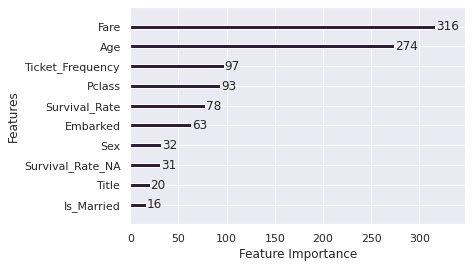

In [163]:
ax = lgb.plot_importance(lgb_model, max_num_features=10)
ax.set_title('')
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Features')
plt.show()

# Optuna

In [164]:
#import optuna.integration.lightgbm as olgb
#import optuna

#rkf = sklearn.model_selection.RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

#params = {
#        "objective": "binary",
#        "metric": "auc",
#        "verbosity": -1,
#        "boosting_type": "gbdt",                
#        "seed": 1
#    }

#d_train = lgb.Dataset(data = X_train, 
#                      label = y_train, 
#                      free_raw_data = False, 
#                      categorical_feature = cat_features)
#d_eval = lgb.Dataset(data = X_test, 
#                     label = y_test, 
#                     reference = d_train, 
#                     free_raw_data = False, 
#                     categorical_feature = cat_features)

#study_tuner = optuna.create_study(direction='maximize')
#optuna.logging.set_verbosity(optuna.logging.WARNING) 
#
#tuner = olgb.LightGBMTunerCV(params, 
#                            d_train, 
#                            categorical_feature=cat_features,
#                            study=study_tuner,
#                            verbose_eval=False,                            
#                            early_stopping_rounds=250,
#                            time_budget=19800,
#                            seed = 1,
#                            #folds=rkf,
#                            num_boost_round=10000,
#                            callbacks=[lgb.reset_parameter(learning_rate = [0.005]*200 + [0.001]*9800) ] #[0.1]*5 + [0.05]*15 + [0.01]*45 + 
#                           )

#tuner.run()

In [165]:
#print("ROC AUC Score: {:.8f}".format(tuner.best_score))

In [166]:
#tmp_best_params = tuner.best_params
#if tmp_best_params['feature_fraction']==1:
#    tmp_best_params['feature_fraction']=1.0-1e-9
#if tmp_best_params['feature_fraction']==0:
#    tmp_best_params['feature_fraction']=1e-9
#if tmp_best_params['bagging_fraction']==1:
#    tmp_best_params['bagging_fraction']=1.0-1e-9
#if tmp_best_params['bagging_fraction']==0:
#    tmp_best_params['bagging_fraction']=1e-9

In [167]:
#d_train = lgb.Dataset(data = X_train, 
#                      label = y_train, 
#                      free_raw_data = False, 
#                      categorical_feature = cat_features)
#d_eval = lgb.Dataset(data = X_test, 
#                     label = y_test, 
#                     reference = d_train, 
#                     free_raw_data = False, 
#                     categorical_feature = cat_features)
#
#best_score = 999
#training_rounds = 10000

#def objective(trial):
#    # Specify a search space using distributions across plausible values of hyperparameters.
#    param = {
#        "objective": "binary",
#        "metric": "auc",
#        "verbosity": -1,
#        "boosting_type": "gbdt",                
#        "seed": 1,
#        "feature_pre_filter" : False,
#        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
#        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
#        'num_leaves': trial.suggest_int('num_leaves', 2, 512),
#        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
#        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.1, 1.0),
#        'bagging_freq': trial.suggest_int('bagging_freq', 0, 15),
#        'min_child_samples': trial.suggest_int('min_child_samples', 1, 100),
#        'seed': 1
#    }
    
    # Run LightGBM for the hyperparameter values
#    lgbcv = lgb.cv(param,
#                   d_train,
#                   categorical_feature=cat_features,
#                   #folds=rkf,
#                   verbose_eval=False,
#                   early_stopping_rounds=250,
#                   num_boost_round=10000,
#                   callbacks=[lgb.reset_parameter(learning_rate = [0.005]*200 + [0.001]*9800) ]
#                  )
#    
#    cv_score = np.array(lgbcv["auc-mean"]).mean()
#    
#    return cv_score
#
#optuna.logging.set_verbosity(optuna.logging.WARNING) 

# We search for another 4 hours (3600 s are an hours, so timeout=14400).
# We could instead do e.g. n_trials=1000, to try 1000 hyperparameters chosen 
# by optuna or set neither timeout or n_trials so that we keep going until 
# the user interrupts ("Cancel run").
#study = optuna.create_study(direction='maximize')
#study.enqueue_trial(tmp_best_params)
#study.optimize(objective, timeout=600, n_trials = 50)

In [168]:
#print(f"Best Parameters : {study.best_params}",f"Best Score : {study.best_value}",sep="\n")

In [169]:
#best_params = {
#    "objective": "binary",
#    "metric": "auc",
#    "verbosity": -1,
#    "boosting_type": "gbdt",
#    "seed": 1}
#best_params.update(study.best_params)
#best_params

In [170]:
#lgb_ds = lgb.train(best_params,
#                   d_train,
#                   categorical_feature=cat_features,
#                   verbose_eval=False,                   
#                   num_boost_round=training_rounds)

# Catboost Optuna

In [171]:
import catboost as cbd
import optuna

def objective(trial):

    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "n_estimators": trial.suggest_int("n_estimators", 10, 200),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.33),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1.0, 10.0),
        "depth": trial.suggest_int("depth", 1, 10),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "od_type": trial.suggest_categorical("od_type", ["IncToDec","Iter"]),
        "od_wait": trial.suggest_int("od_wait", 10, 50),
        #"early_stopping_rounds": trial.suggest_categorical("early_stopping_rounds", [True, False]),
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    gbm = cbd.CatBoostClassifier(**param)

    gbm.fit(X_train, y_train, verbose=0, early_stopping_rounds=200)

    preds = gbm.predict(X_test)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(y_test, pred_labels)
    return accuracy

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=1000, timeout=600)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 1000
Best trial:
  Value: 0.8547486033519553
  Params: 
    objective: CrossEntropy
    n_estimators: 73
    learning_rate: 0.2664456166754835
    l2_leaf_reg: 1.4523428578810202
    depth: 1
    boosting_type: Ordered
    bootstrap_type: Bernoulli
    od_type: IncToDec
    od_wait: 47
    subsample: 0.5347240131780427


In [172]:
cbd_model = cbd.CatBoostClassifier(**trial.params).fit(X_train, y_train, verbose=0, early_stopping_rounds=100)
cbd_pred = cbd_model.predict(X_test)
cbd_score = sklearn.metrics.accuracy_score(y_test, cbd_pred)
print("Score : {:.8f}".format(cbd_score))

Score : 0.85474860


# Submission

In [173]:
drop_cols = ['Family', 'Family_Size', 'Survived',
             'Name', 'Parch', 'SibSp', 'Ticket',
            'Ticket_Survival_Rate', 'Family_Survival_Rate', 'Ticket_Survival_Rate_NA', 'Family_Survival_Rate_NA']
df_test = df_test.drop(columns = drop_cols)

In [174]:
df_test["Survived"] = np.zeros(418)

In [175]:
df_test.sort_values(by=["PassengerId"],inplace=True)

In [176]:
test_pred = cbd_model.predict(df_test.drop(["Survived","PassengerId"],axis=1))
df_test["Survived"] = test_pred
df_test

,Age,Deck,Embarked,Fare,PassengerId,Pclass,Sex,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married,Survival_Rate,Survival_Rate_NA,Survived
891,7,3,1,2,892,3,1,0,1,3,0,0.383838,0.0,0
892,8,3,2,0,893,3,0,3,1,2,1,0.383838,0.0,1
893,9,3,1,4,894,2,1,0,1,3,0,0.383838,0.0,0
894,5,3,2,4,895,3,1,0,1,3,0,0.383838,0.0,0
895,2,3,2,5,896,3,0,3,2,2,1,1.000000,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,3,2,3,1305,3,1,0,1,3,0,0.383838,0.0,0
1305,7,0,0,12,1306,1,0,0,3,2,0,0.441919,0.5,1
1306,7,3,2,0,1307,3,1,0,1,3,0,0.383838,0.0,0
1307,3,3,2,3,1308,3,1,0,1,3,0,0.383838,0.0,0


In [177]:
submission = df_test[["PassengerId","Survived"]]
submission["Survived"] = submission["Survived"].astype("int")
submission.to_csv(r'submission.csv', index = False)

In [178]:
submission

,PassengerId,Survived
891,892,0
892,893,1
893,894,0
894,895,0
895,896,1
...,...,...
1304,1305,0
1305,1306,1
1306,1307,0
1307,1308,0
